<h3> Exploring Gradient Boosting with Mushroom dataset </h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./Datasets/mushrooms.csv')

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('class' , axis=1)
y = data['class']

# One-Hot Encoding features
X = pd.get_dummies(X , drop_first=True , dtype=int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [3]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [ 100 , 150],
    'learning_rate':[0.1 , 0.05 , 0.2],
    'max_depth':[3 , 4 ,5]
}

Model = GridSearchCV(estimator=GradientBoostingClassifier() , param_grid=params )
Model.fit(X_train , y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [100, 150]})

In [ ]:
Model.best_params_ # Default values were the best

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Classification Report : 
               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



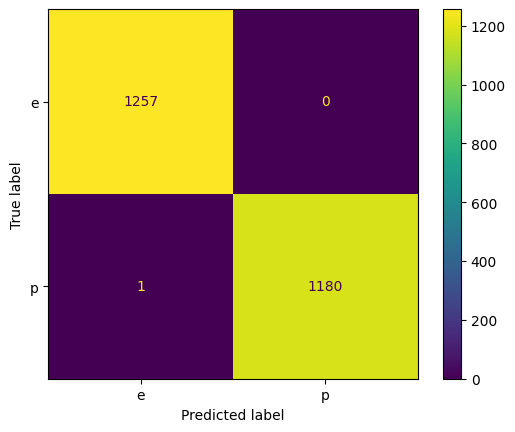

In [5]:
from sklearn.metrics import classification_report , confusion_matrix , ConfusionMatrixDisplay

preds = Model.predict(X_test)

print("Classification Report : \n" , classification_report(y_test , preds))

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , preds) , display_labels=Model.classes_).plot()
plt.show()

In [33]:
Imp_features = pd.DataFrame(index=X.columns , data=Model.best_estimator_.feature_importances_ , columns=['Importance'])
Imp_features = Imp_features.sort_values('Importance')
Imp_features = Imp_features[Imp_features['Importance'] > 0.005]

Imp_features

,Importance
odor_p,0.005182
gill-size_n,0.008617
gill-spacing_w,0.012107
odor_l,0.013580
odor_f,0.015842
stalk-root_r,0.026616
spore-print-color_r,0.033535
stalk-surface-below-ring_y,0.041341
bruises_t,0.051862
stalk-root_c,0.134761


C:\Users\mohit\AppData\Local\Temp\ipykernel_6276\9173881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=Imp_features , x=Imp_features.index , y='Importance' , palette='husl')


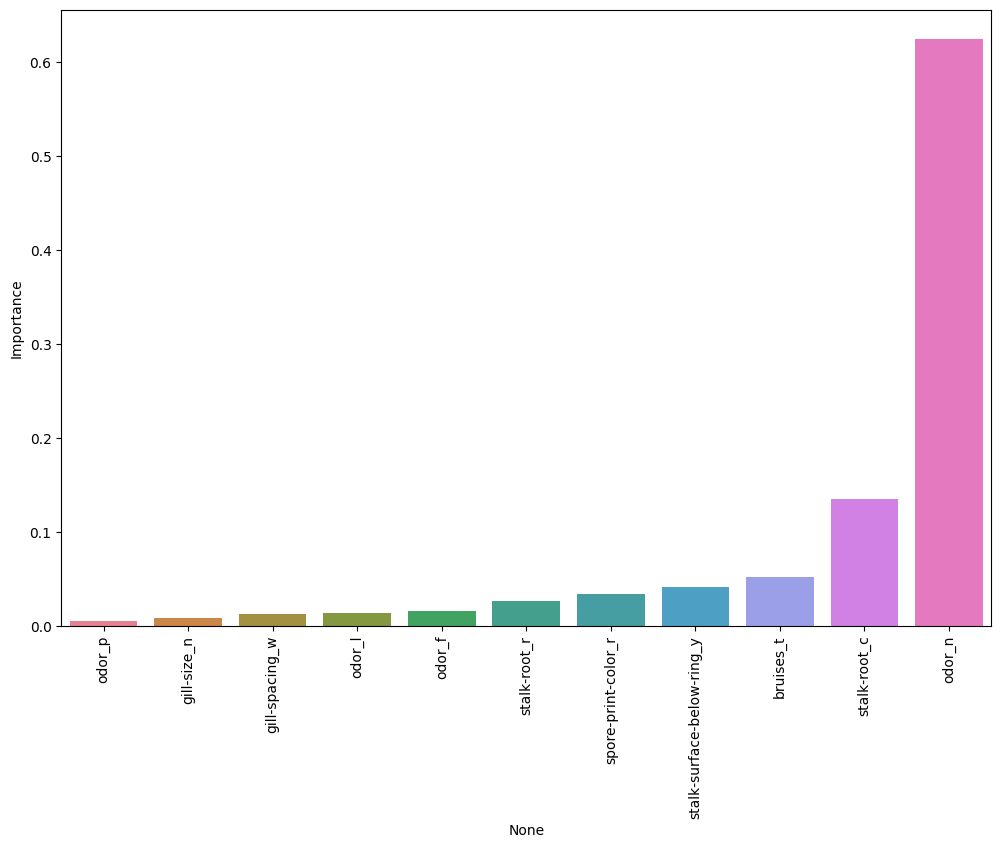

In [34]:
plt.figure(figsize=(12,8) , dpi=100)
sns.barplot(data=Imp_features , x=Imp_features.index , y='Importance' , palette='husl')
plt.xticks(rotation=90);